# Machine Learning

<strong>Importing clean dataset:</strong>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('genshin.csv')
df

,Name,HP,ATK,DEF,Ascension Stat,Ascension Stat Value,Release Date,Element,Weapon,Sex,Nation,rarity,birthday
0,Lisa,9570,232,573,Elemental Mastery,96,2020-09-28,Electro,Catalyst,Female,Mondstadt,4.0,0000-06-09
1,Razor,11962,234,751,Physical DMG Bonus,30.0%,2020-09-28,Electro,Claymore,Male,Mondstadt,4.0,0000-09-09
2,Qiqi,12368,287,922,Healing Bonus,22.2%,2020-09-28,Cryo,Sword,Female,Liyue,5.0,0000-03-03
3,Noelle,12071,191,799,DEF,30.0%,2020-09-28,Geo,Claymore,Female,Mondstadt,4.0,0000-03-21
4,Ningguang,9787,212,573,Geo DMG Bonus,24.0%,2020-09-28,Geo,Catalyst,Female,Liyue,4.0,0000-08-26
5,Mona,10409,287,653,Energy Recharge,32.0%,2020-09-28,Hydro,Catalyst,Female,Mondstadt,5.0,0000-08-31
6,Keqing,13103,323,799,CRIT DMG,38.4%,2020-09-28,Electro,Sword,Female,Liyue,5.0,0000-11-20
7,Venti,10531,263,669,Energy Recharge,32.0%,2020-09-28,Anemo,Bow,Male,Mondstadt,5.0,0000-06-16
8,Kaeya,11636,223,792,Energy Recharge,26.7%,2020-09-28,Cryo,Sword,Male,Mondstadt,4.0,0000-11-30
9,Sucrose,9243,170,703,Anemo DMG Bonus,24.0%,2020-09-28,Anemo,Catalyst,Female,Mondstadt,4.0,0000-11-26


<strong>Encoding categorical values for preperation of Machine Learning model:</strong>

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics, tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.neural_network import MLPRegressor

import datetime as dt

label_encoder = LabelEncoder()
df['sex_encode'] = label_encoder.fit_transform(df['Sex'])
df['weapon_encode'] = label_encoder.fit_transform(df['Weapon'])
df['element_encode'] = label_encoder.fit_transform(df['Element'])
df['nation_encode'] = label_encoder.fit_transform(df['Nation'])

df['Release Date'] = pd.to_datetime(df['Release Date']) 
df['date_delta'] = (df['Release Date'] - df['Release Date'].min())  / np.timedelta64(1,'D')
df

,Name,HP,ATK,DEF,Ascension Stat,Ascension Stat Value,Release Date,Element,Weapon,Sex,Nation,rarity,birthday,sex_encode,weapon_encode,element_encode,nation_encode,date_delta
0,Lisa,9570,232,573,Elemental Mastery,96,2020-09-28,Electro,Catalyst,Female,Mondstadt,4.0,0000-06-09,0,1,2,2,0.0
1,Razor,11962,234,751,Physical DMG Bonus,30.0%,2020-09-28,Electro,Claymore,Male,Mondstadt,4.0,0000-09-09,1,2,2,2,0.0
2,Qiqi,12368,287,922,Healing Bonus,22.2%,2020-09-28,Cryo,Sword,Female,Liyue,5.0,0000-03-03,0,4,1,1,0.0
3,Noelle,12071,191,799,DEF,30.0%,2020-09-28,Geo,Claymore,Female,Mondstadt,4.0,0000-03-21,0,2,3,2,0.0
4,Ningguang,9787,212,573,Geo DMG Bonus,24.0%,2020-09-28,Geo,Catalyst,Female,Liyue,4.0,0000-08-26,0,1,3,1,0.0
5,Mona,10409,287,653,Energy Recharge,32.0%,2020-09-28,Hydro,Catalyst,Female,Mondstadt,5.0,0000-08-31,0,1,4,2,0.0
6,Keqing,13103,323,799,CRIT DMG,38.4%,2020-09-28,Electro,Sword,Female,Liyue,5.0,0000-11-20,0,4,2,1,0.0
7,Venti,10531,263,669,Energy Recharge,32.0%,2020-09-28,Anemo,Bow,Male,Mondstadt,5.0,0000-06-16,1,0,0,2,0.0
8,Kaeya,11636,223,792,Energy Recharge,26.7%,2020-09-28,Cryo,Sword,Male,Mondstadt,4.0,0000-11-30,1,4,1,2,0.0
9,Sucrose,9243,170,703,Anemo DMG Bonus,24.0%,2020-09-28,Anemo,Catalyst,Female,Mondstadt,4.0,0000-11-26,0,1,0,2,0.0


<strong>Preparing training and testing sets:</strong>

In [3]:
X_train = df[["date_delta", "rarity"]]
y_train = df[["element_encode", "sex_encode", "weapon_encode", "nation_encode"]]

y_actual = np.array([[2, 0, 3, 0]]) #The next characters basic info

x_new = pd.Series()
x_new["date_delta"] = 338.0 
x_new["rarity"] = 5.0

scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_new_st = scaler.transform(pd.DataFrame([x_new]))

<ipython-input-3-7e91295c1f4a>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  x_new = pd.Series()


<strong>Different Models used for comparison for prediction:</strong>

In [4]:
model = LinearRegression()
model.fit(X=X_train_st, y=y_train)
y_pred = model.predict(X=X_new_st)
lin_reg = np.sqrt(metrics.mean_squared_error(y_actual, y_pred))

print("Actual Value:",  y_actual, " (Electro, Female, Polearm, Inazuma)")
print("Predicted Value:",  y_pred, " (Electro, Female, Claymore, Inazuma)")

Actual Value: [[2 0 3 0]]  (Electro, Female, Polearm, Inazuma)
Predicted Value: [[1.73723487 0.19326743 2.4385257  0.30757052]]  (Electro, Female, Claymore, Inazuma)


In [5]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X=X_train_st, y=y_train)
y_pred = model.predict(X=X_new_st)
knn_reg = np.sqrt(metrics.mean_squared_error(y_actual, y_pred))

print("Actual Value:",  y_actual, " (Electro, Female, Polearm, Inazuma)")
print("Predicted Value:",  y_pred, " (Electro, Female, Polearm, Inazuma)")

Actual Value: [[2 0 3 0]]  (Electro, Female, Polearm, Inazuma)
Predicted Value: [[2.         0.33333333 2.66666667 0.        ]]  (Electro, Female, Polearm, Inazuma)


In [6]:
model = tree.DecisionTreeRegressor()
model.fit(X=X_train_st, y=y_train)
y_pred = model.predict(X=X_new_st)
dt_reg = np.sqrt(metrics.mean_squared_error(y_actual, y_pred))

print("Actual Value:",  y_actual, " (Electro, Female, Polearm, Inazuma)")
print("Predicted Value:",  y_pred, " (Pyro, Female, Bow, Inazuma)")

Actual Value: [[2 0 3 0]]  (Electro, Female, Polearm, Inazuma)
Predicted Value: [[5. 0. 0. 0.]]  (Pyro, Female, Bow, Inazuma)


In [7]:
model = RandomForestRegressor(max_depth=1, random_state=0)
model.fit(X=X_train_st, y=y_train)
y_pred = model.predict(X=X_new_st)
rf_reg = np.sqrt(metrics.mean_squared_error(y_actual, y_pred))

print("Actual Value:",  y_actual, " (Electro, Female, Polearm, Inazuma)")
print("Predicted Value:",  y_pred, " (Electro, Female, Claymore, Liyue)")

Actual Value: [[2 0 3 0]]  (Electro, Female, Polearm, Inazuma)
Predicted Value: [[1.67079031 0.25493221 2.45053363 0.51485694]]  (Electro, Female, Claymore, Liyue)


In [8]:
model = Ridge(alpha=0)
model.fit(X=X_train_st, y=y_train)
y_pred = model.predict(X=X_new_st)
rid_reg = np.sqrt(metrics.mean_squared_error(y_actual, y_pred))

print("Actual Value:",  y_actual, " (Electro, Female, Polearm, Inazuma)")
print("Predicted Value:",  y_pred, " (Electro, Female, Claymore, Inazuma)")

Actual Value: [[2 0 3 0]]  (Electro, Female, Polearm, Inazuma)
Predicted Value: [[1.73723487 0.19326743 2.4385257  0.30757052]]  (Electro, Female, Claymore, Inazuma)


In [9]:
kernel = DotProduct() + WhiteKernel()
model = GaussianProcessRegressor(kernel=kernel, random_state=0)
model.fit(X=X_train_st, y=y_train)
y_pred = model.predict(X=X_new_st)
gp_reg = np.sqrt(metrics.mean_squared_error(y_actual, y_pred))

print("Actual Value:",  y_actual, " (Electro, Female, Polearm, Inazuma)")
print("Predicted Value:",  y_pred, " (Electro, Female, Claymore, Inazuma)")

Actual Value: [[2 0 3 0]]  (Electro, Female, Polearm, Inazuma)
Predicted Value: [[1.73202843 0.19699928 2.39965558 0.33507276]]  (Electro, Female, Claymore, Inazuma)


In [10]:
model = MLPRegressor(random_state=1, max_iter=200, solver='adam')
model.fit(X=X_train_st, y=y_train)
y_pred = model.predict(X=X_new_st)
mlp_reg = np.sqrt(metrics.mean_squared_error(y_actual, y_pred))

print("Actual Value:",  y_actual, " (Electro, Female, Polearm, Inazuma)")
print("Predicted Value:",  y_pred, " (Electro, Female, Polearm, Inazuma)")

Actual Value: [[2 0 3 0]]  (Electro, Female, Polearm, Inazuma)
Predicted Value: [[2.30375579 0.32135756 2.80874615 0.35114925]]  (Electro, Female, Polearm, Inazuma)


## Overall Result

K Nearest Neighbor (n = 3):         0.2357022603955159
Multi-Level Perceptron Regression:  0.29808643548542363
Linear Regression:                  0.3592529873634325
Ridge Regression:                   0.35925298736343253
Gausian Process Regression:         0.3818719239591911
Random Forest Regression:           0.43022099269633035
Decision Tree Regression:           2.1213203435596424


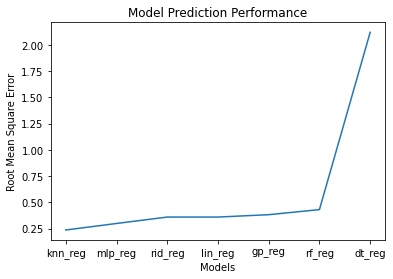

In [11]:
print("K Nearest Neighbor (n = 3):        ", knn_reg)
print("Multi-Level Perceptron Regression: ", mlp_reg)
print("Linear Regression:                 ", lin_reg)
print("Ridge Regression:                  ", rid_reg)
print("Gausian Process Regression:        ", gp_reg)
print("Random Forest Regression:          ", rf_reg)
print("Decision Tree Regression:          ", dt_reg)

# x axis values
x = ["knn_reg", "mlp_reg", "rid_reg", "lin_reg", "gp_reg", "rf_reg", "dt_reg"]
# corresponding y axis values
y = [knn_reg, mlp_reg, lin_reg, rid_reg, gp_reg, rf_reg, dt_reg]
 
# plotting the points
plt.plot(x, y)
 
# naming the x axis
plt.xlabel('Models')
# naming the y axis
plt.ylabel('Root Mean Square Error')
 
# giving a title to my graph
plt.title('Model Prediction Performance')
 
# function to show the plot
plt.show()

<strong>We can see here that the best performing model to be used for our dataset is the K Nearest Neighbor Model with a root mean square error of .2357, with the worst being the Decision Tree Regression with an error of 2.1213. It is expected that the root mean square error value is high considering it is hard to predict the future of a game.</strong>

<strong>For example, these graphs shows how irregular the release of characters are. There's just no pattern or trend to predict the next character accurately.</strong>

In [12]:
df.set_index('Release Date', inplace=True)

<AxesSubplot:title={'center':'Element Over the Course of 1 Year'}, xlabel='Release Date'>

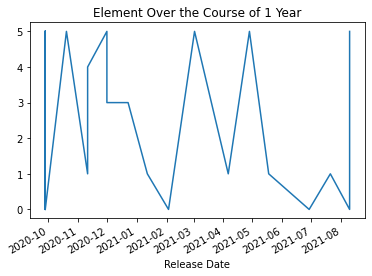

In [13]:
plt.title('Element Over the Course of 1 Year')
df['element_encode'].plot()

<AxesSubplot:title={'center':'Gender Over the Course of 1 Year'}, xlabel='Release Date'>

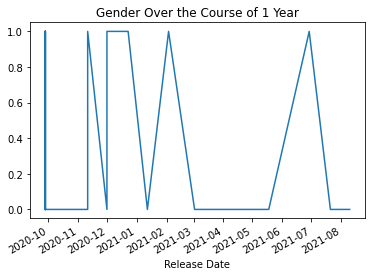

In [14]:
plt.title('Gender Over the Course of 1 Year')
df['sex_encode'].plot()

<AxesSubplot:title={'center':'Weapon Over the Course of 1 Year'}, xlabel='Release Date'>

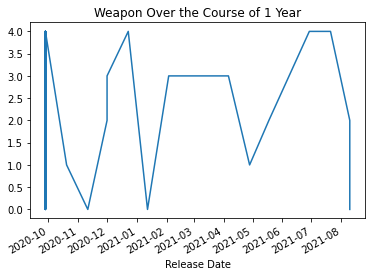

In [15]:
plt.title('Weapon Over the Course of 1 Year')
df['weapon_encode'].plot()

<AxesSubplot:title={'center':'Nation Over the Course of 1 Year'}, xlabel='Release Date'>

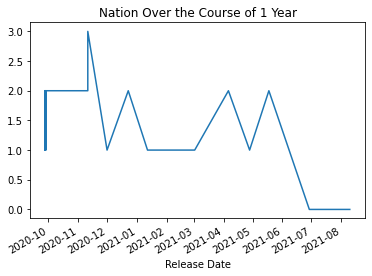

In [16]:
plt.title('Nation Over the Course of 1 Year')
df['nation_encode'].plot()